### Muti Qubits Circuits

In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qutip import *

#### Controlled Phase Rotation

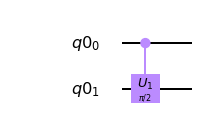

In [2]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cu1(pi/2,q[0], q[1])
qc.draw(output='mpl')

In [3]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]]


-------------------

#### U operator and control phase gate

$ (U_3 \otimes I \otimes I)  \times (CU_1 \otimes I ) \times (I \otimes U_3 \otimes I)  \times (I \otimes CU_1) \times (I \otimes I \otimes U)$

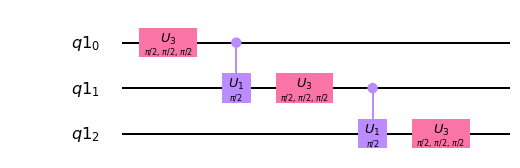

In [4]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

qc.u3(pi/2,pi/2,pi/2,q[0])
qc.cu1(pi/2,q[0], q[1])
qc.u3(pi/2,pi/2,pi/2,q[1])
qc.cu1(pi/2,q[1], q[2])
qc.u3(pi/2,pi/2,pi/2,q[2])

qc.draw(output='mpl')

In [5]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.354+0.j    -0.   -0.354j -0.   -0.354j -0.354+0.j    -0.   -0.354j
  -0.354+0.j    -0.354+0.j     0.   +0.354j]
 [ 0.   +0.354j -0.354+0.j     0.   +0.354j -0.354+0.j     0.354-0.j
   0.   +0.354j  0.354-0.j     0.   +0.354j]
 [ 0.   +0.354j  0.354-0.j    -0.354+0.j     0.   +0.354j  0.   +0.354j
   0.354-0.j    -0.354+0.j     0.   +0.354j]
 [-0.354+0.j    -0.   -0.354j  0.354-0.j     0.   +0.354j -0.354+0.j
  -0.   -0.354j  0.354-0.j     0.   +0.354j]
 [ 0.   +0.354j  0.354-0.j     0.354-0.j    -0.   -0.354j -0.354+0.j
   0.   +0.354j  0.   +0.354j  0.354-0.j   ]
 [-0.354+0.j    -0.   -0.354j -0.354+0.j    -0.   -0.354j -0.   -0.354j
   0.354-0.j    -0.   -0.354j  0.354-0.j   ]
 [-0.354+0.j     0.   +0.354j -0.   -0.354j -0.354+0.j     0.354-0.j
  -0.   -0.354j  0.   +0.354j  0.354-0.j   ]
 [-0.   -0.354j  0.354-0.j     0.   +0.354j -0.354+0.j     0.   +0.354j
  -0.354+0.j    -0.   -0.354j  0.354-0.j   ]]


------------

#### All Gates together in 4-qubit circut

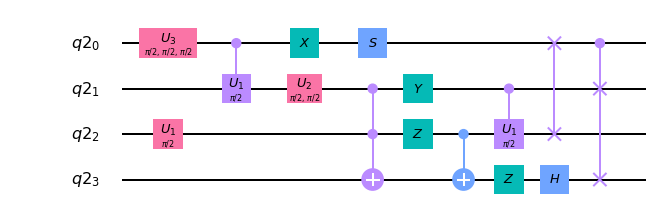

In [6]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)

qc.u3(pi/2,pi/2,pi/2,q[0])
qc.cu1(pi/2,q[0], q[1])
qc.u2(pi/2,pi/2,q[1])
qc.u1(pi/2,q[2])
qc.x(q[0])
qc.ccx(q[1],q[2],q[3])
qc.y(q[1])
qc.z(q[2])
qc.cx(q[2],q[3])
qc.z(q[3])
qc.h(q[3])
qc.s(q[0])
qc.cu1(pi/2,q[1], q[2])
qc.swap(q[0],q[2])
qc.cswap(q[0],q[1],q[3])

qc.draw(output='mpl')

In [8]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.   +0.354j -0.354+0.j    -0.   -0.354j  0.354-0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j    -0.   -0.354j  0.354-0.j
   0.   +0.354j -0.354+0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.354-0.j
   0.   +0.354j -0.354+0.j    -0.   -0.354j  0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j    -0.354+0.j    -0.   -0.354j  0.354-0.j
   0.   +0.354j]
 [-0.354+0.j    -0.   -0.354j -0.354+0.j    -0.   -0.354j  0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.354-0.j     0.   +0.354j
   0.354-0.j     0.   +0.354j  0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.354-0.j
   0.   +0.354j -0.354+0.j    -0.   -0.354j  0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.354-0.j     0.   +0.354j -0.354+0.j
  -0.   -0.354j]
 [ 0.   +0.354j  0.354-0.j    -0.354+0.j     0.   +0.354j  0.   +0.j
   0.   +0.j     0.   +0.j     0